# ApRES deployment timeline
Started Oct 12 2023

This plot is a more official version of this sketch below, used to describe the state of the ApRES data.
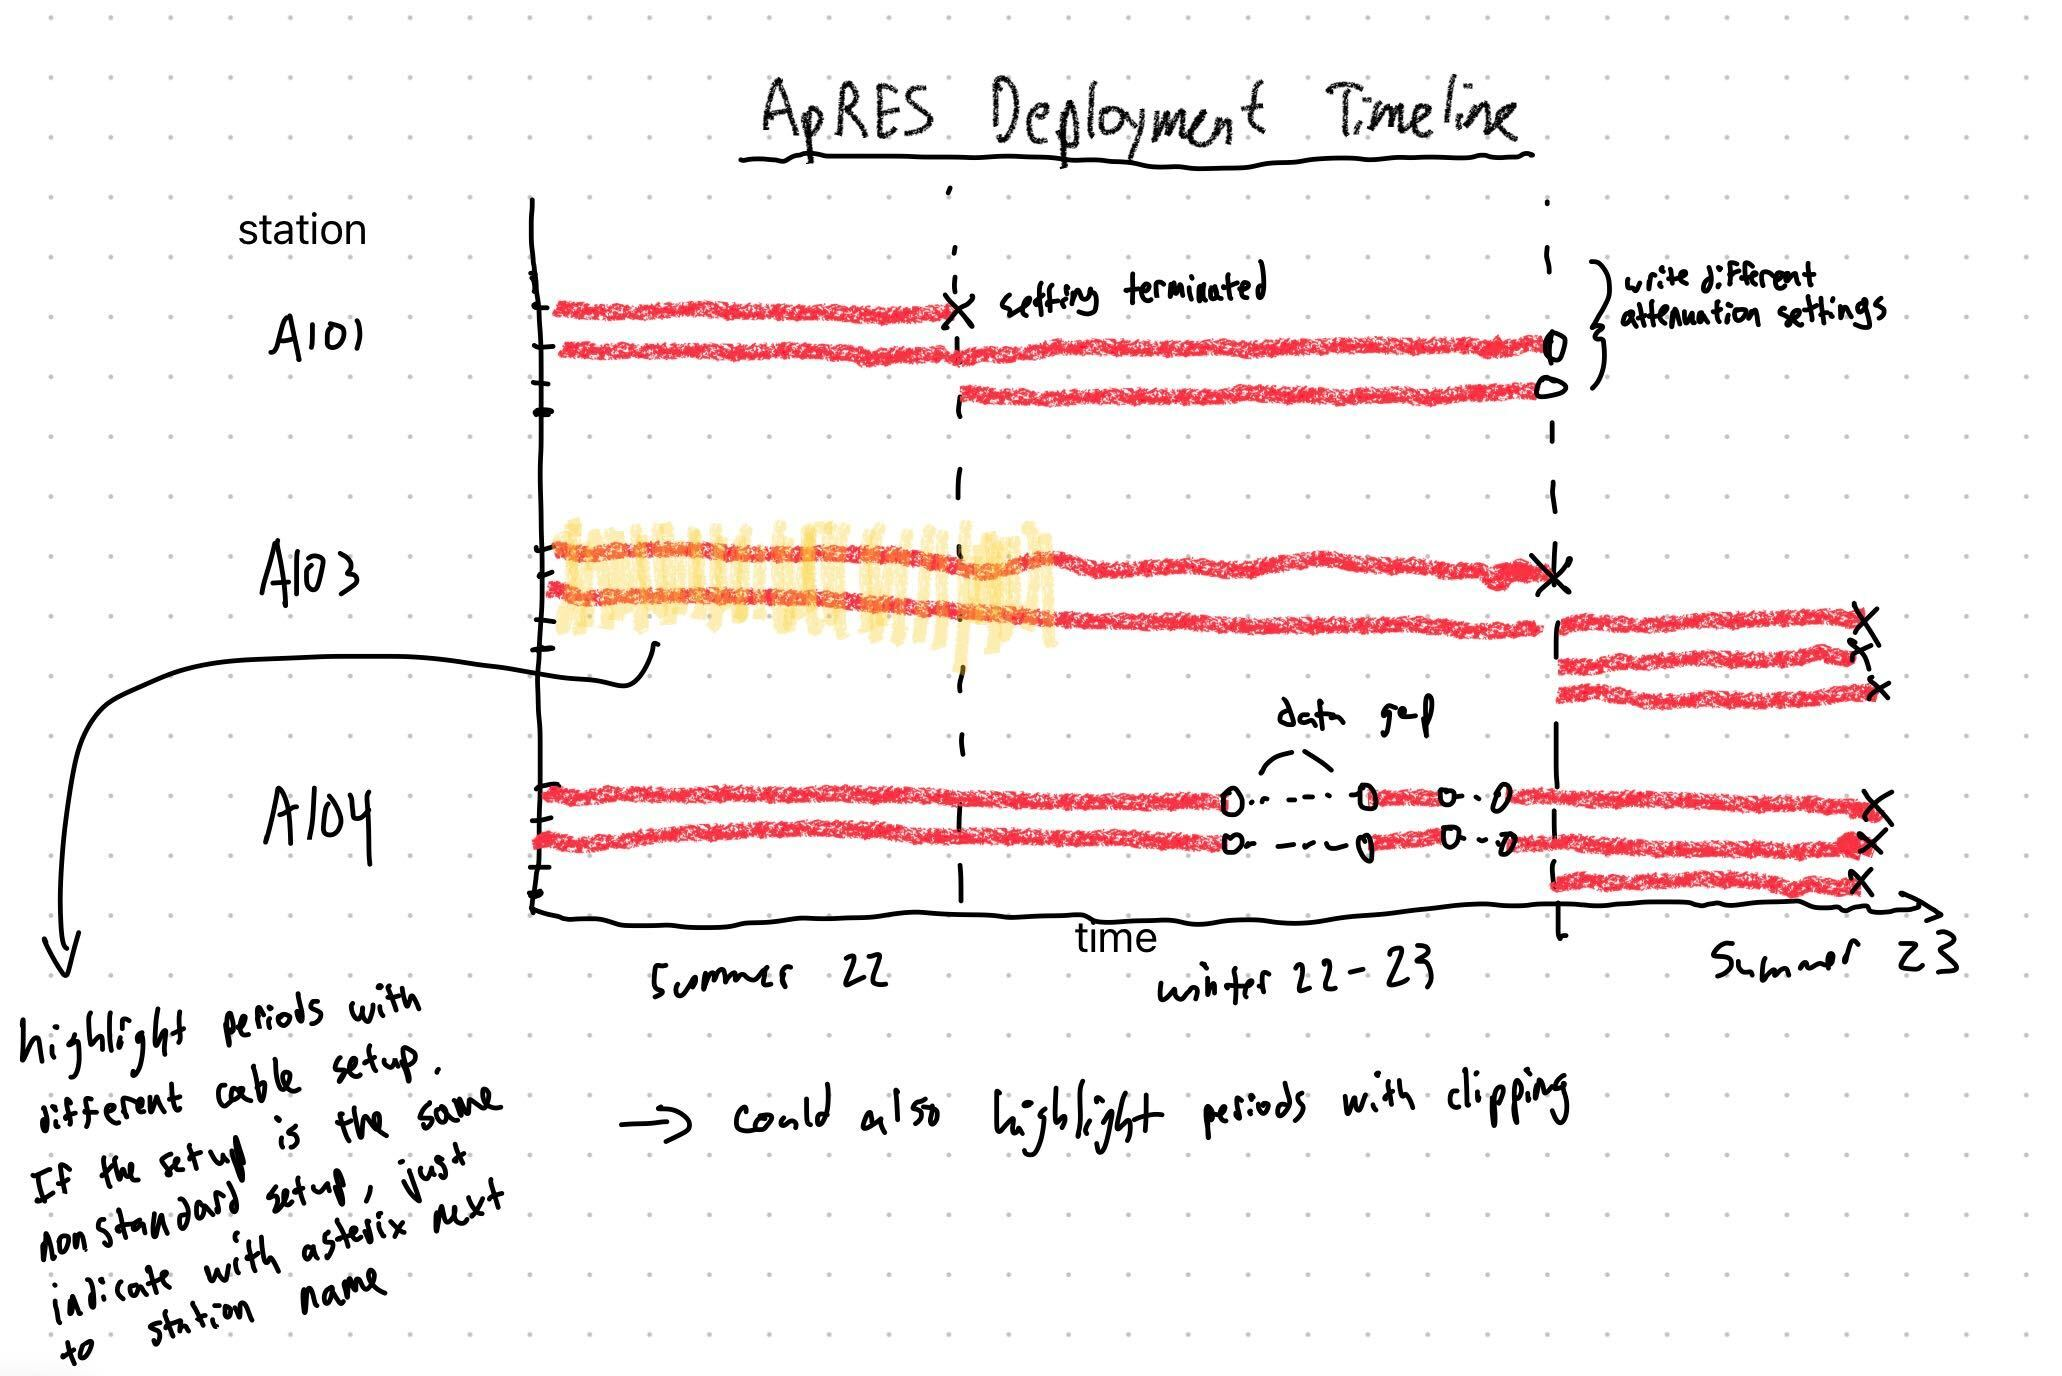

In [2]:
# Load libraries
import sys
import sys
sys.path.append("../../xapres_package/")
import ApRESDefs
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import importlib
import pandas as pd
importlib.reload(ApRESDefs)
xa = ApRESDefs.xapres(loglevel='debug')

DEBUG    18:37:21 	 ApRESDefs.py @function _setup_logging line 615 - Stream logging level set to DEBUG
DEBUG    18:37:21 	 ApRESDefs.py @function _setup_logging line 616 - Add console handler to logger
DEBUG    18:37:21 	 ApRESDefs.py @function _setup_logging line 629 - File logging level set to DEBUG


In [3]:
# Load data
def reload(site):
    filename = f'gs://ldeo-glaciology/apres/greenland/2022/single_zarrs_noencode/{site}'
    ds = xr.open_dataset(filename,
        engine='zarr', 
        chunks={}) 
    return ds

ds_101 = reload("A101")
ds_103 = reload("A103_fixed")
ds_104 = reload("A104")

In [16]:
# Load data
def reload(site):
    filename = f'gs://ldeo-glaciology/apres/greenland/2022/single_zarrs_noencode/{site}'
    ds = xr.open_dataset(filename,
        engine='zarr', 
        chunks={}) 
    return ds

ds_101 = reload("A101")
ds_103 = reload("A103_fixed")
ds_104 = reload("A104")

ds_101 = ds_101.isel(time=range(20,len(ds_101.time)))
ds_103 = ds_103.isel(time=range(60,len(ds_103.time)))
ds_104 = ds_104.isel(time=range(50,len(ds_104.time)))


def reload_winter(site):
    filename = f'gs://ldeo-glaciology/apres/greenland/2022/single_zarrs_noencode/{site}_winter22_23'
    ds = xr.open_dataset(filename,
        engine='zarr', 
        consolidated=True, 
        chunks={}) 
    return ds

ds_101_w = reload_winter("A101")
ds_103_w = reload_winter("A103")
ds_104_w = reload_winter("A104")

def reload_summer(site):
    filename = f'gs://ldeo-glaciology/apres/greenland/2022/single_zarrs_noencode/{site}_summer_23'
    ds = xr.open_dataset(filename,
        engine='zarr', 
        consolidated=True, 
        chunks={}) 
    return ds

ds_101_s = reload_summer("A101")
ds_103_s = reload_summer("A103")
ds_104_s = reload_summer("A104")

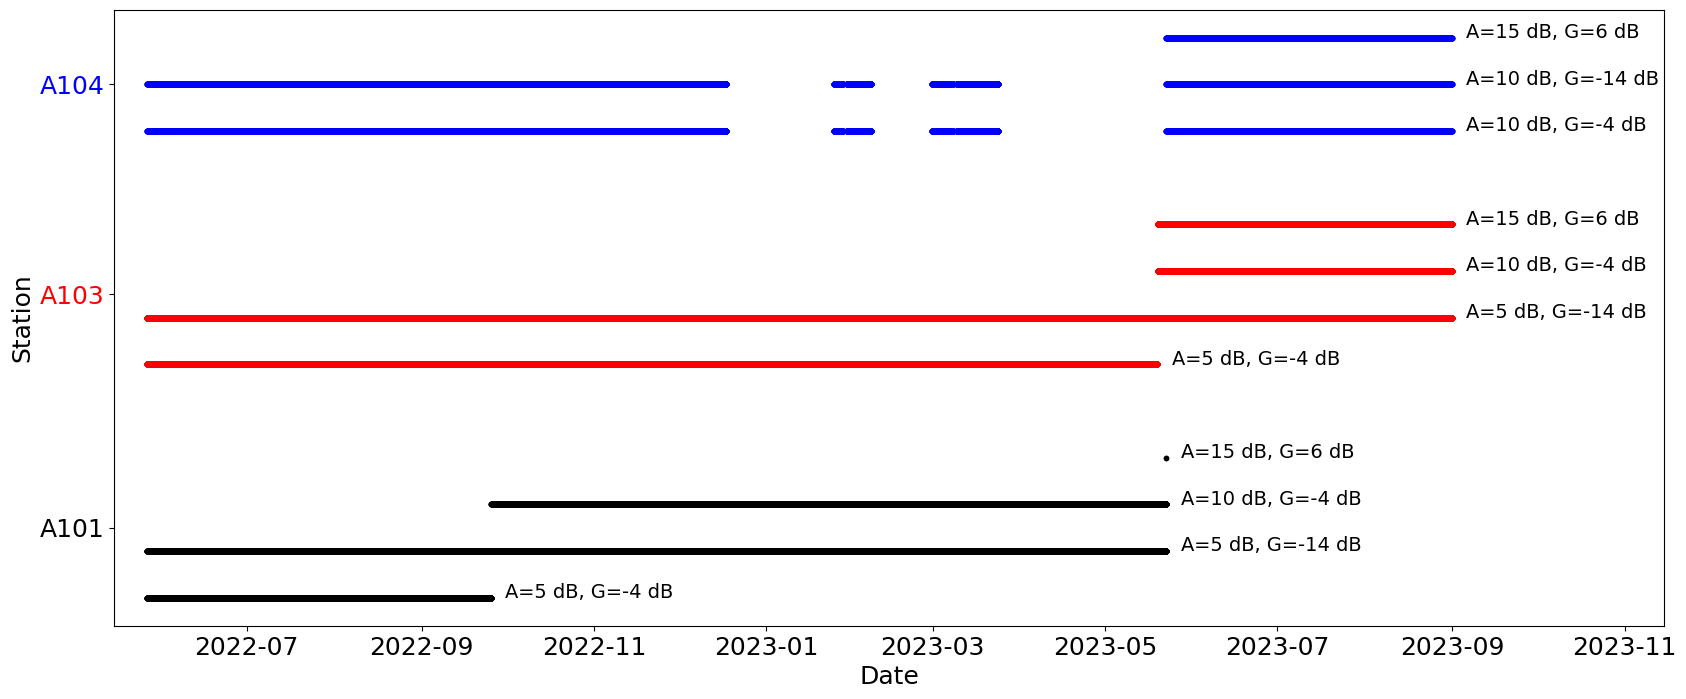

In [17]:
fig, ax = plt.subplots(figsize=(20,8))
anchors = [0,1,2]
a101 = [ds_101,ds_101_w, ds_101_s]
a103 = [ds_103,ds_103_w, ds_103_s]
a104 = [ds_104,ds_104_w, ds_104_s]
site_array = [a101,a103,a104]
site_names = ['A101','A103','A104']
station_colors = ['black','red','blue']
true_anchors = []

for i in anchors:
    station_array = site_array[i]
    setting_count = 0
    setting_pairs = []
    labels = []
    for season in station_array:
        for j in range(len(season.attenuator_setting_pair)):
            pair = (season.attenuator.values[j],season.AFGain.values[j])
            if pair not in setting_pairs:
                setting_pairs.append(pair)
                anchor_point = i + 0.2*setting_count
                setting_count += 1   
                plt.plot(season.time.values,anchor_point*np.ones(season.time.values.shape),linestyle='None',marker='.',color=station_colors[i])
                text = ax.text(season.time.values[-1]+np.timedelta64(5,'D'),anchor_point,f'A={int(pair[0])} dB, G={pair[1]} dB',fontsize=14)
                labels.append(text)
            else:
                anchor_point = i + 0.2*setting_pairs.index(pair)
                plt.plot(season.time.values,anchor_point*np.ones(season.time.values.shape),linestyle='None',marker='.',color=station_colors[i])
                labels[setting_pairs.index(pair)].set_position((season.time.values[-1]+np.timedelta64(5,'D'),anchor_point))

    true_anchors.append(i + 0.1*(setting_count-1))
ax.set_yticks(true_anchors)
ax.set_yticklabels(site_names,fontsize=14)
for ytick, color in zip(ax.get_yticklabels(), station_colors):
    ytick.set_color(color)
plt.xlim([np.datetime64('2022-05-15'), np.datetime64('2023-11-15')])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Station',fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)


In [57]:
season.time.values

array(['2022-09-25T13:49:28.000000000', '2022-09-25T13:55:00.000000000',
       '2022-09-25T14:09:30.000000000', ...,
       '2023-03-24T05:05:44.000000000', '2023-03-24T05:20:44.000000000',
       '2023-03-24T05:35:43.000000000'], dtype='datetime64[ns]')